In [6]:
# Full Code

import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_1, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_1[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_1[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 기본 매개변수
Nin = 784
Nh_1 = [100, 50]
number_of_class = 10
Nout = number_of_class


Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 1s 25us/step - loss: 0.3684 - accuracy: 0.8977 - val_loss: 0.1832 - val_accuracy: 0.9472
Epoch 2/40
48000/48000 [==============================] - 1s 22us/step - loss: 0.1568 - accuracy: 0.9544 - val_loss: 0.1331 - val_accuracy: 0.9612
Epoch 3/40
48000/48000 [==============================] - 1s 23us/step - loss: 0.1088 - accuracy: 0.9680 - val_loss: 0.1204 - val_accuracy: 0.9624
Epoch 4/40
48000/48000 [==============================] - 1s 21us/step - loss: 0.0835 - accuracy: 0.9755 - val_loss: 0.1088 - val_accuracy: 0.9689
Epoch 5/40
48000/48000 [==============================] - 1s 21us/step - loss: 0.0675 - accuracy: 0.9794 - val_loss: 0.1017 - val_accuracy: 0.9711
Epoch 6/40
48000/48000 [==============================] - 1s 23us/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0960 - val_accuracy: 0.9722
Epoch 7/40
48000/48000 [==============================] - 1s 24us/st

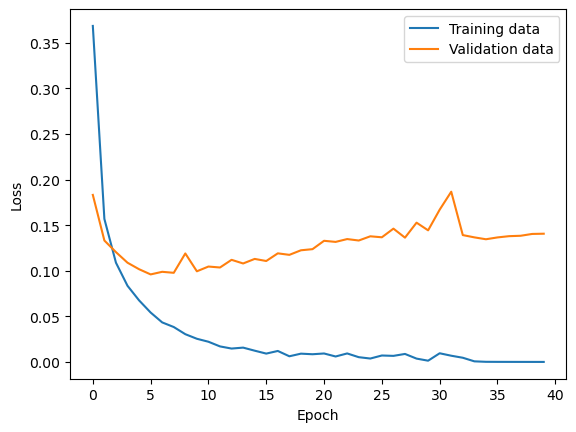

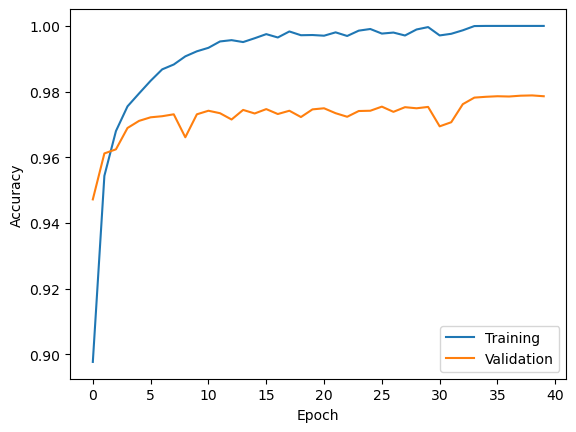

In [10]:
def data_func():
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L, H, W = x_train.shape
    x_train = x_train.reshape(-1, W * H)
    x_test = x_test.reshape(-1, W * H)
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    
    return (x_train, y_train), (x_test, y_test)

import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss, plot_acc

def main():
    model = DNN(Nin, Nh_1, Nout)
    (x_train, y_train), (x_test, y_test) = data_func()
    
    history = model.fit(x_train, y_train, batch_size=100, epochs = 40, validation_split=0.2)
    performance_test = model.evaluate(x_test, y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show
    
    
if __name__ == '__main__':
    main()